In [2]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import time
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

# Bifurcation

In [2]:
def bifurcation_map(x, r):
    return r * x * (1 - x)

In [3]:
def get_bifurcation(x0, r, n_steps=100):
    xs = [0.0] * (n_steps + 1)
    xs[0] = x0

    for i in range(n_steps):
        xs[i + 1] = bifurcation_map(xs[i], r)

    return xs

n_steps = 100
x0 = 0.2
r = 1

xs = get_bifurcation(x0, r, n_steps)

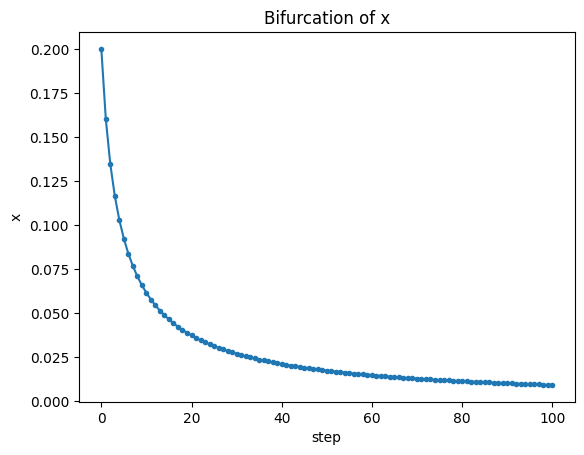

In [4]:
plt.plot(xs, marker='.')
plt.title('Bifurcation of x')
plt.xlabel('step')
plt.ylabel('x')
plt.show()

In [5]:
rs = np.linspace(2, 5, 5000)
n = 2000
m = 200
x0 = 0.1

In [6]:
def calculate_last_ms_vec(rs, x0, n, m):
    last_ms = [0.0] * m
    x = np.array([x0 for _ in rs])

    for i in range(n):
        x = bifurcation_map(x, rs)

    for i in range(m):
        x = bifurcation_map(x, rs)
        last_ms[i] = bifurcation_map(x, rs)

    last_ms = np.array(last_ms)

    return last_ms

In [7]:
def calculate_last_ms(rs, x0, n, m):
    last_ms = []

    for r in rs:
        xs = get_bifurcation(x0, r, n+m)
        last_m = xs[-m:]
        last_ms.append(last_m)

    last_ms = np.array(last_ms)

    return last_ms

## Dumb realization(loop over all r)

In [8]:
start = time.perf_counter()
last_ms = calculate_last_ms(rs, x0, n, m)
time_elapsed = time.perf_counter() - start
single_process_time = time_elapsed
print(time_elapsed)

3.6960370930000295


In [9]:
N_CORES = [i for i in range(2, 15)]
time_elapsed_array = [single_process_time]
for N in tqdm(N_CORES):
    list_array = np.array_split(rs, N)
    start = time.perf_counter()
    data = Parallel(n_jobs=N, verbose=0)(delayed(calculate_last_ms)(array, x0, n, m) for array in list_array)
    time_elapsed = time.perf_counter() - start
    time_elapsed_array.append(time_elapsed)

  8%|▊         | 1/13 [00:02<00:30,  2.55s/it]/tmp/ipykernel_1347/2677591130.py:2: RuntimeWarning: overflow encountered in scalar multiply
/tmp/ipykernel_1347/2677591130.py:2: RuntimeWarning: overflow encountered in scalar multiply
 15%|█▌        | 2/13 [00:04<00:23,  2.18s/it]/tmp/ipykernel_1347/2677591130.py:2: RuntimeWarning: overflow encountered in scalar multiply
/tmp/ipykernel_1347/2677591130.py:2: RuntimeWarning: overflow encountered in scalar multiply
 23%|██▎       | 3/13 [00:06<00:19,  1.96s/it]/tmp/ipykernel_1347/2677591130.py:2: RuntimeWarning: overflow encountered in scalar multiply
/tmp/ipykernel_1347/2677591130.py:2: RuntimeWarning: overflow encountered in scalar multiply
 31%|███       | 4/13 [00:08<00:17,  1.96s/it]/tmp/ipykernel_1347/2677591130.py:2: RuntimeWarning: overflow encountered in scalar multiply
/tmp/ipykernel_1347/2677591130.py:2: RuntimeWarning: overflow encountered in scalar multiply
/tmp/ipykernel_1347/2677591130.py:2: RuntimeWarning: overflow encountere

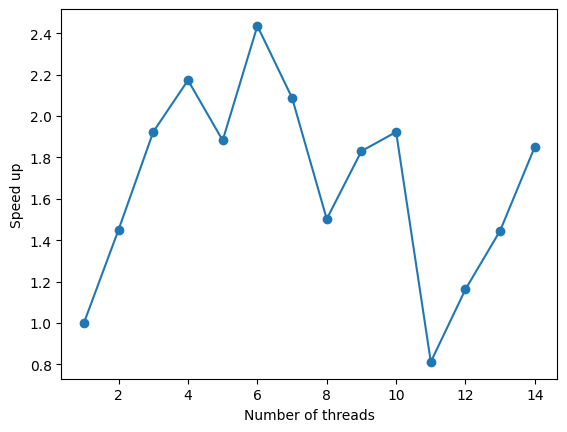

In [10]:
plt.plot([1] + N_CORES, single_process_time / np.array(time_elapsed_array), '-o')
plt.xlabel('Number of threads')
plt.ylabel('Speed up')
plt.show()

## Vectorized version

Let's increase number of rs so paralleling will give visible result.

In [15]:
rs = np.linspace(2, 5, 2**18)

In [16]:
start = time.perf_counter()
last_ms = calculate_last_ms_vec(rs, x0, n, m)
time_elapsed = time.perf_counter() - start
single_process_time = time_elapsed
print(time_elapsed)

5.27742649999999


In [17]:
N_CORES = [i for i in range(2, 15)]
time_elapsed_array = [single_process_time]
for N in tqdm(N_CORES):
    list_array = np.array_split(rs, N)
    start = time.perf_counter()
    data = Parallel(n_jobs=N, verbose=0)(delayed(calculate_last_ms_vec)(array, x0, n, m) for array in list_array)
    time_elapsed = time.perf_counter() - start
    time_elapsed_array.append(time_elapsed)

 15%|█▌        | 2/13 [00:13<01:16,  7.00s/it]/tmp/ipykernel_1347/2677591130.py:2: RuntimeWarning: overflow encountered in multiply
/tmp/ipykernel_1347/2677591130.py:2: RuntimeWarning: overflow encountered in multiply
 23%|██▎       | 3/13 [00:18<00:59,  5.95s/it]/tmp/ipykernel_1347/2677591130.py:2: RuntimeWarning: overflow encountered in multiply
/tmp/ipykernel_1347/2677591130.py:2: RuntimeWarning: overflow encountered in multiply
 31%|███       | 4/13 [00:23<00:49,  5.50s/it]/tmp/ipykernel_1347/2677591130.py:2: RuntimeWarning: overflow encountered in multiply
/tmp/ipykernel_1347/2677591130.py:2: RuntimeWarning: overflow encountered in multiply
/tmp/ipykernel_1347/2677591130.py:2: RuntimeWarning: overflow encountered in multiply
 38%|███▊      | 5/13 [00:27<00:40,  5.02s/it]/tmp/ipykernel_1347/2677591130.py:2: RuntimeWarning: overflow encountered in multiply
/tmp/ipykernel_1347/2677591130.py:2: RuntimeWarning: overflow encountered in multiply
/tmp/ipykernel_1347/2677591130.py:2: Runti

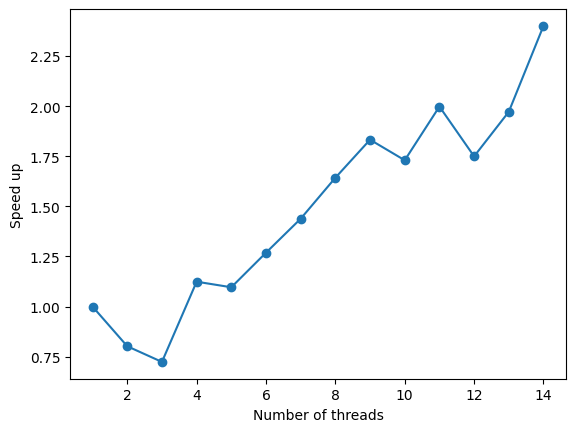

In [19]:
plt.plot([1] + N_CORES, single_process_time / np.array(time_elapsed_array), '-o')
plt.xlabel('Number of threads')
plt.ylabel('Speed up')
plt.show()

# Spectrogram

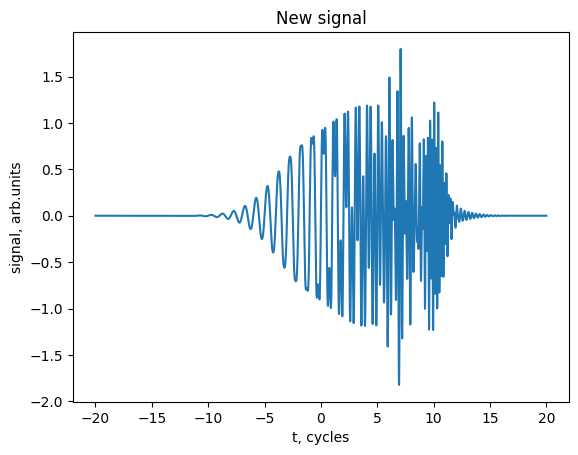

In [79]:
nofts=1000
t=np.linspace(-20*2*np.pi, 20*2*np.pi, 2**15)
y=np.sin(t)*np.exp(-t**2/2/20**2)
y=y+np.sin(3*t)*np.exp(-(t-5*2*np.pi)**2/2/20**2)
y=y+np.sin(5.5*t)*np.exp(-(t-10*2*np.pi)**2/2/5**2)
y_new=y+np.sin(4*t)*np.exp(-(t-7*2*np.pi)**2/2/5**2)

plt.plot(t/2/np.pi,y_new)

plt.xlabel('t, cycles')
plt.ylabel('signal, arb.units')
plt.title('New signal')
plt.show()

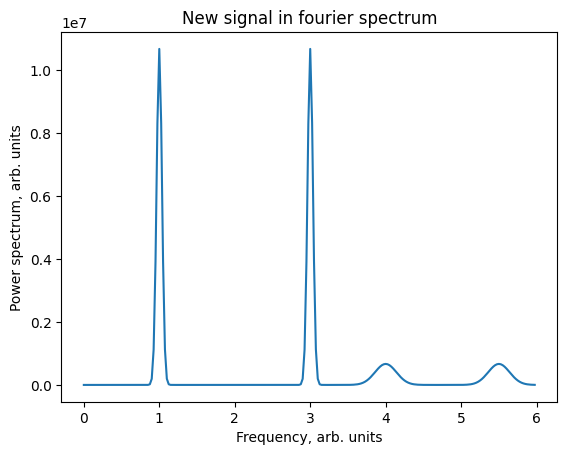

In [80]:
sp_new=np.fft.fft(y_new)
w_new=np.fft.fftfreq(len(y_new), d=(t[1]-t[0])/2/np.pi)
plt.plot(w_new[:240], abs(sp_new[:240])**2)
plt.xlabel('Frequency, arb. units')
plt.ylabel('Power spectrum, arb. units')
plt.title('New signal in fourier spectrum')
plt.show()

In [81]:
def get_window(t, shift, window_width):
    return np.exp(-(t - shift)**2 / 2 / window_width**2)

def get_specgram(window, window_width, ts):
    specgram = np.ones([len(ts[:240]), len(window)])

    for i, shift in enumerate(window):
        y_window = ts * get_window(t, shift, window_width)
        specgram[:, i] = abs(np.fft.fft(y_window))[:240]

    return specgram

In [82]:
window=np.linspace(-20*2*np.pi, 20*2*np.pi, 10000)
specgram_new = get_specgram(window, 2*np.pi, y_new)

In [83]:
def plot_spectrogram(x, z, grid_active=False):
    plt.figure(figsize=(10, 6))
    plt.imshow(z, aspect='auto', origin='lower',
               extent=[min(x)/2/np.pi, max(x)/2/np.pi, 0, 6])
    cbar = plt.colorbar()
    cbar.ax.tick_params()
    plt.title("Spectrogram")
    plt.xlabel("t, cycles")
    plt.ylabel("Frequency, arb. units")
    plt.xticks()
    plt.yticks()
    plt.grid(grid_active)

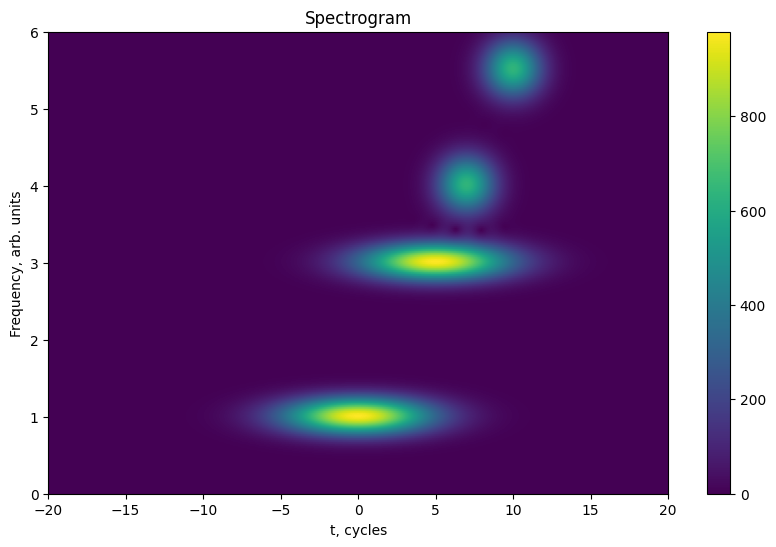

In [84]:
plot_spectrogram(t, specgram_new)
plt.show()

In [85]:
N_CORES = [i for i in range(1, 10)]
time_elapsed_array = []
for N in tqdm(N_CORES):
    list_array = np.array_split(window, N)
    start = time.perf_counter()
    data = Parallel(n_jobs=N, verbose=0)(delayed(get_specgram)(array, 2*np.pi, y_new) for array in list_array)
    time_elapsed = time.perf_counter() - start
    time_elapsed_array.append(time_elapsed)

time_elapsed_array = np.array(time_elapsed_array)

100%|██████████| 9/9 [01:33<00:00, 10.41s/it]


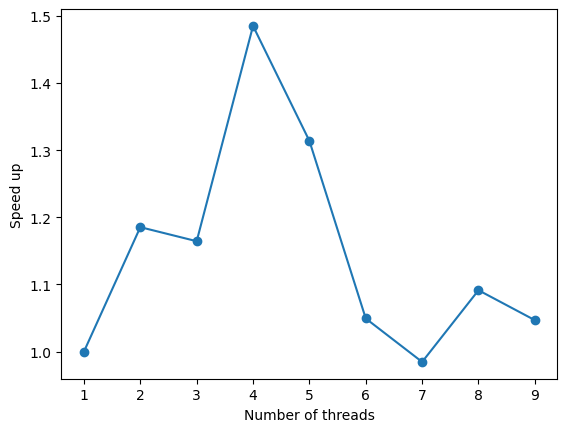

In [88]:
plt.plot(N_CORES, time_elapsed_array[0] / time_elapsed_array, '-o')
plt.xlabel('Number of threads')
plt.ylabel('Speed up')
plt.show()